# Using Data Modelling for Predicting Bank Direct Marketing Outcome

* Write out the problem statement
Bank Direct Marketing involves banks directly communicating their offers to customers. It is an increasingly popular method  being employed by organizations to market products to their customers and it comes with its associated costs.


* Give a short description of the project
Banks host a large repository of their customers data, which could be used in directing targeted marketing campaigns to selected customers via personal contact, emails, and telephone calls. The immediate option of getting a direct feedback immediately from the customers makes this direct marketing campaigns a popular choice for many financial institutions.

This project is to predict the outome of the direct marketing campaign of a Portuguese banking institution by building and testing different machine learning models.


In [1]:
#import python libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

! pip install -U imbalanced-learn

#import other libraries....

# Data Inspection

* Load the data set
* Within a markdown cell, give a description of the dataset:
    * what is the source of the data?
    * how many rows and columns?
    * does it have missing values?
    * any other significant details

## Data Source
This dataset is public available for research. The details are described in [Moro et al., 2011]. 

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.tx
                              
## Data Structure
 The data has 4521  columns and  17  rows.

## Missing Values
 Missing values were discoverd as 'unknown' entries in some columns.

In [3]:
# load the data
#the semi-colon is specified in separator because the data file uses semi-colons for delimiters
data = pd.read_csv("C:/Users/username/Downloads/bank.csv",sep = ';', header=None)
data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [4]:
#set values in the first row as columns to the data frame
data.rename(columns = data.iloc[0],inplace=True)
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [5]:
#delete the first row 
data.drop(0,inplace=True)
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
6,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
7,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
8,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
9,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
10,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


## Inspect the data


In [6]:
# Get information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   object
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   object
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   object
 10  month      4521 non-null   object
 11  duration   4521 non-null   object
 12  campaign   4521 non-null   object
 13  pdays      4521 non-null   object
 14  previous   4521 non-null   object
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: object(17)
memory usage: 600.6+ KB


In [7]:
# Counting the number of unknown values in the data

data[data =='unknown'].count().to_frame()
    

,0
age,0
job,38
marital,0
education,187
default,0
balance,0
housing,0
loan,0
contact,1324
day,0


In [8]:
# Confirm number of rows & columns
print ('There are ',data.shape[0],' columns and ',data.shape[1],' rows in the data set')

There are  4521  columns and  17  rows in the data set


# Data Cleansing

* Handling missing values (NaN). 
    
    Missing values will be evaluated to know the extent at which it affects the data. Columns with significant missing value       will be dropped while those with insignificant missing values will have entire rows dropped.


* Replacing text
    
    Text values with unknown variables will be dropped.


* Removing or deleting unnecessary records
    
    Unnecessary columns that will not fit the model will be dropped.

In [9]:
# Change data types of numeric columns to either integer or float

data1 =data.astype({'balance':float,'age':int,'day':int,'duration':int,'pdays':int,'previous':int,'campaign':int})
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   int32  
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4521 non-null   float64
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4521 non-null   object 
 9   day        4521 non-null   int32  
 10  month      4521 non-null   object 
 11  duration   4521 non-null   int32  
 12  campaign   4521 non-null   int32  
 13  pdays      4521 non-null   int32  
 14  previous   4521 non-null   int32  
 15  poutcome   4521 non-null   object 
 16  y          4521 non-null   object 
dtypes: float64(1), int32(6), object(10)
memory usage: 494.6+ KB


In [10]:
# drop unnecessary columns & rows

# Get row indices for rows with the value 'unknown'
index_unk = data1[(data1['education']=='unknown') | (data1['job']=='unknown')].index
print (index_unk)

# Drop rows with unknown values
data1.drop(index_unk, inplace =True)

# Drop Columns with unknown values
data1.drop(['contact','poutcome'],axis =1, inplace= True)

print (data1.shape)

data1.head()



Int64Index([  21,   28,   50,   96,  133,  134,  140,  143,  150,  151,
            ...
            4226, 4261, 4280, 4317, 4338, 4343, 4429, 4430, 4472, 4509],
           dtype='int64', length=210)
(4311, 15)


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
1,30,unemployed,married,primary,no,1787.0,no,no,19,oct,79,1,-1,0,no
2,33,services,married,secondary,no,4789.0,yes,yes,11,may,220,1,339,4,no
3,35,management,single,tertiary,no,1350.0,yes,no,16,apr,185,1,330,1,no
4,30,management,married,tertiary,no,1476.0,yes,yes,3,jun,199,4,-1,0,no
5,59,blue-collar,married,secondary,no,0.0,yes,no,5,may,226,1,-1,0,no


In [11]:
# Confirm if unknown values have been dropped

data1[data1=='unknown'].count().to_frame()


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
day,0
month,0


In [12]:
# Convert categorical variables to integers and drop one of the outcomes to avoid dummy trap

dummies = pd.get_dummies(data1,columns=['job', 'marital', 'education', 'default','housing','loan'],drop_first=True )
dummies.head()


,age,balance,day,month,duration,campaign,pdays,previous,y,job_blue-collar,...,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes
1,30,1787.0,19,oct,79,1,-1,0,no,0,...,0,0,1,1,0,0,0,0,0,0
2,33,4789.0,11,may,220,1,339,4,no,0,...,0,0,0,1,0,1,0,0,1,1
3,35,1350.0,16,apr,185,1,330,1,no,0,...,0,0,0,0,1,0,1,0,1,0
4,30,1476.0,3,jun,199,4,-1,0,no,0,...,0,0,0,1,0,0,1,0,1,1
5,59,0.0,5,may,226,1,-1,0,no,1,...,0,0,0,1,0,1,0,0,1,0


In [13]:
# View data types and columns of new dataframe

dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4311 entries, 1 to 4521
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4311 non-null   int32  
 1   balance              4311 non-null   float64
 2   day                  4311 non-null   int32  
 3   month                4311 non-null   object 
 4   duration             4311 non-null   int32  
 5   campaign             4311 non-null   int32  
 6   pdays                4311 non-null   int32  
 7   previous             4311 non-null   int32  
 8   y                    4311 non-null   object 
 9   job_blue-collar      4311 non-null   uint8  
 10  job_entrepreneur     4311 non-null   uint8  
 11  job_housemaid        4311 non-null   uint8  
 12  job_management       4311 non-null   uint8  
 13  job_retired          4311 non-null   uint8  
 14  job_self-employed    4311 non-null   uint8  
 15  job_services         4311 non-null   u

# Data Visualization

In this section, visualize import relationships in the data set.

## Univariate Analysis

Create charts where you plot only one variable (column) at a time. 

You can use simple charts like histograms and boxplots.

> For example, use a histogram to plot an age distribution column (if you have one).

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

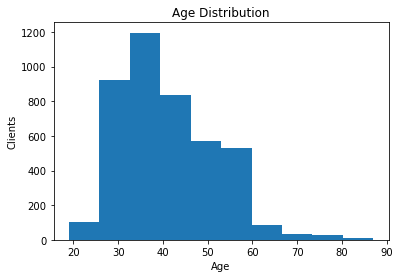

In [14]:
#univariate analysis cells
plt.hist(x='age',data=dummies )
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Clients')
plt.show()

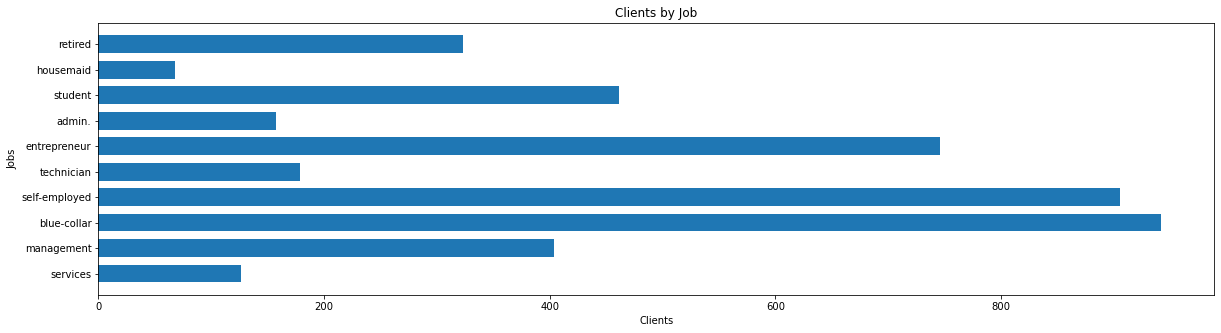

In [15]:
#univariate analysis cells
plt.figure(figsize= (20,5))
plt.hist(x='job',data=data1,orientation='horizontal', rwidth=0.7,align='right')
plt.xlabel('Clients')
plt.ylabel('Jobs')
plt.title('Clients by Job')
plt.show()


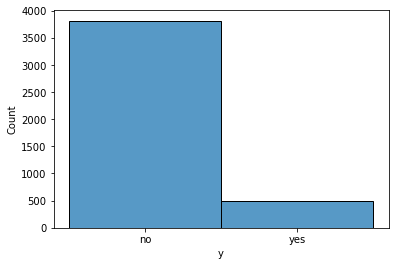

In [16]:
sns.histplot(data=data1,x='y')
plt.show()

<AxesSubplot:ylabel='y'>

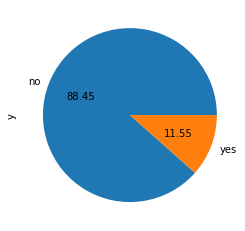

In [18]:
# Show percentage of Clients who subscribed and did not subscribe to a term deposit
data1.y.value_counts().plot.pie(autopct='%.2f')

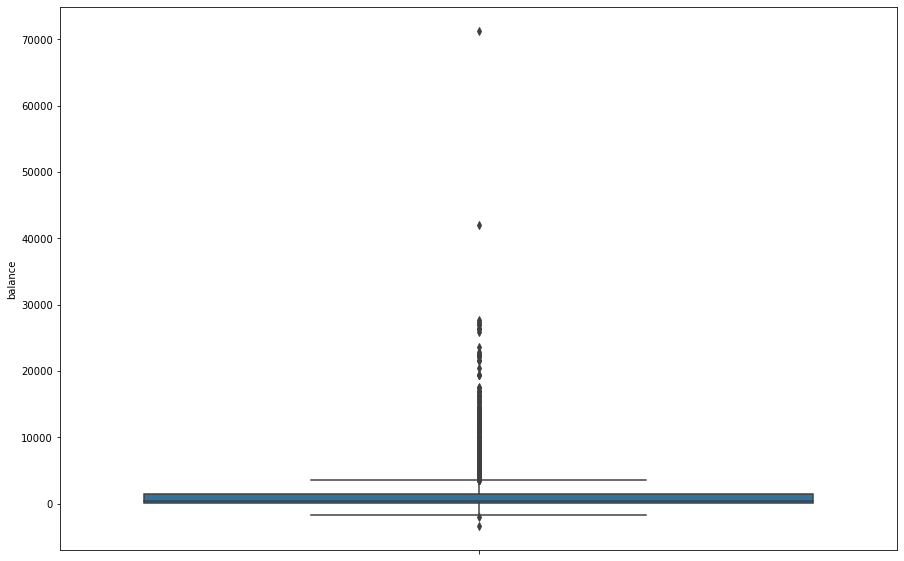

In [19]:
#univariate analysis cells
%matplotlib inline

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(y='balance', data=data1)
plt.show()


In [20]:
dummies['balance'].describe()

count     4311.000000
mean      1410.662723
std       3015.650889
min      -3313.000000
25%         66.500000
50%        440.000000
75%       1456.000000
max      71188.000000
Name: balance, dtype: float64

## Bivariate Analysis

Create charts where you plot only two variables at a time on a chart. 

You can use visuals like bar charts, boxplots, scatter plots and so on.

> You can plot variables like age against number of purchases, etc

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

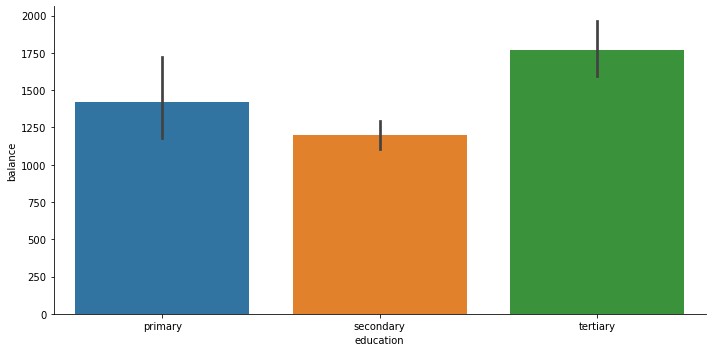

In [21]:
#bivariate analysis cells
order_edu = ['primary', 'secondary', 'tertiary']
sns.catplot(data=data1,x='education',y='balance', order= order_edu,height=5, aspect=2, kind ='bar')
plt.show()

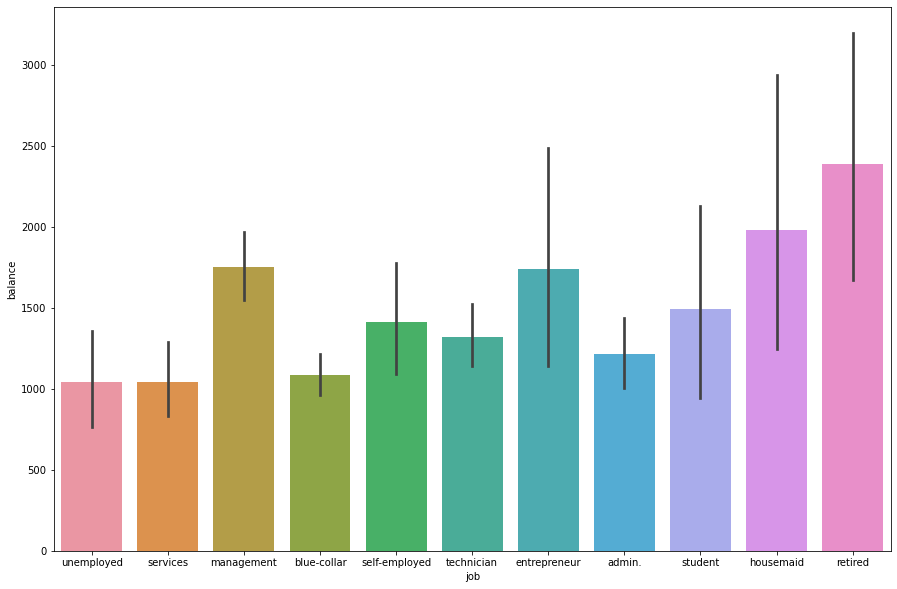

In [22]:
#bivariate analysis cells
ordered_colors =  ['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired']
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data = data1, x = 'job', y = 'balance', order = ordered_colors);
plt.show() 

## Multivariate Analysis

Create charts where you plot more than two variables at a time on a chart. 

You can use visuals like bar charts, scatter plots and so on.

> Explore how to use the `hue` parameter in `seaborn` chart types

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

In [ ]:
#multivariate analysis cells
data1.education.unique()

In [ ]:
#multivariate analysis cells


In [ ]:
#multivariate analysis cells


# Summary of Findings

In this markdown cell, summarize your list of findings.

1. Majority of the bank's customers were aged between 25 to 45 years and were majorly customers with blue-colar jobs.
2. The average bank balance held by these customers was an average of USD1,400
3. Customers with tetiary education had more funds in their accounts
4. Retirees had more bank balances than any other job types
5. There is a class imbalance in the y column 

# Modelling

In this section, you will train and evaluate your models


In [23]:
# Examine the data
dummies.head()

,age,balance,day,month,duration,campaign,pdays,previous,y,job_blue-collar,...,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes
1,30,1787.0,19,oct,79,1,-1,0,no,0,...,0,0,1,1,0,0,0,0,0,0
2,33,4789.0,11,may,220,1,339,4,no,0,...,0,0,0,1,0,1,0,0,1,1
3,35,1350.0,16,apr,185,1,330,1,no,0,...,0,0,0,0,1,0,1,0,1,0
4,30,1476.0,3,jun,199,4,-1,0,no,0,...,0,0,0,1,0,0,1,0,1,1
5,59,0.0,5,may,226,1,-1,0,no,1,...,0,0,0,1,0,1,0,0,1,0


## Select Target

<AxesSubplot:ylabel='y'>

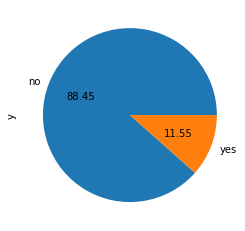

In [24]:
y = dummies.y
y.value_counts().plot(kind='pie',autopct='%.2f')

The chart above shows a very high class imbalance and this would result in our model learning too much of the dominant class,
which in this case in 'no'

To solve this we will be using the Random oversampling from the imblearn library to resample the class 'yes'

## Select Features

In [26]:
X = dummies.drop(columns=['day', 'month','y'])
X.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes
1,30,1787.0,79,1,-1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,33,4789.0,220,1,339,4,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
3,35,1350.0,185,1,330,1,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
4,30,1476.0,199,4,-1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1
5,59,0.0,226,1,-1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0


## Random Oversampling

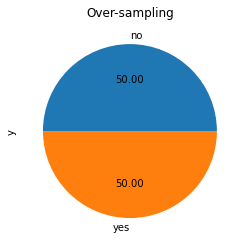

In [27]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

## Train Test Split

In [28]:
# import train_test_split 
from sklearn.model_selection import train_test_split

In [29]:
# Split the data into 80% training set and 20% test set
X_train,X_test, y_train, y_test =train_test_split(X_res,y_res,test_size=0.2, random_state=2)

## Import ML algorithms and initialize them

In [30]:
# import neccessary models for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
# Initialize models
LR = LogisticRegression(max_iter=1000)
KN = KNeighborsClassifier()
DC = DecisionTreeClassifier()
RF = RandomForestClassifier()

# Pass models into list "models"

models =[LR,KN,DC,RF]

## Train and Test the models

In [32]:
def trainer(models,X_train,y_train,X_test,y_test):
    #fit your model
    models.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, scores are\n {} '.format(models.__class__.__name__,classification_report(y_test, prediction)))
    print('\nFor {}, Confusion Matrix is\n {} '.format(models.__class__.__name__,confusion_matrix(y_test, prediction)))
 

In [33]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)
    


For LogisticRegression, scores are
               precision    recall  f1-score   support

          no       0.79      0.82      0.80       787
         yes       0.80      0.77      0.79       739

    accuracy                           0.80      1526
   macro avg       0.80      0.79      0.80      1526
weighted avg       0.80      0.80      0.80      1526
 

For LogisticRegression, Confusion Matrix is
 [[642 145]
 [167 572]] 

For KNeighborsClassifier, scores are
               precision    recall  f1-score   support

          no       0.97      0.79      0.87       787
         yes       0.82      0.98      0.89       739

    accuracy                           0.88      1526
   macro avg       0.90      0.88      0.88      1526
weighted avg       0.90      0.88      0.88      1526
 

For KNeighborsClassifier, Confusion Matrix is
 [[623 164]
 [ 16 723]] 

For DecisionTreeClassifier, scores are
               precision    recall  f1-score   support

          no       0.99      0

## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

In predicting the probability of a customer subscribing to a term deposit, the models has the following outcome.

    1. The Logistic Regression Model has an accuracy score of 0.80, precision of 0.80 and recall of 0.77

    2. The KNeighborsClassifier has an accuracy score of 0.88, precision of 0.82 and recall of 0.98

    3. The KNeighborsClassifier has an accuracy score of 0.94, precision of 0.90 and recall of 0.99

    4. The RandomForestClassifier has an accuracy score of 0.97, precision of 0.94 and recall of 0.99

## Summary

What model should be deployed to production?
Any other comments?

The RandomForestClassifier should be deployed as it outperformed the other models with an accuracy score of 0.97 and a
F1 score of 0.97